# What makes Happiness?

Hallo

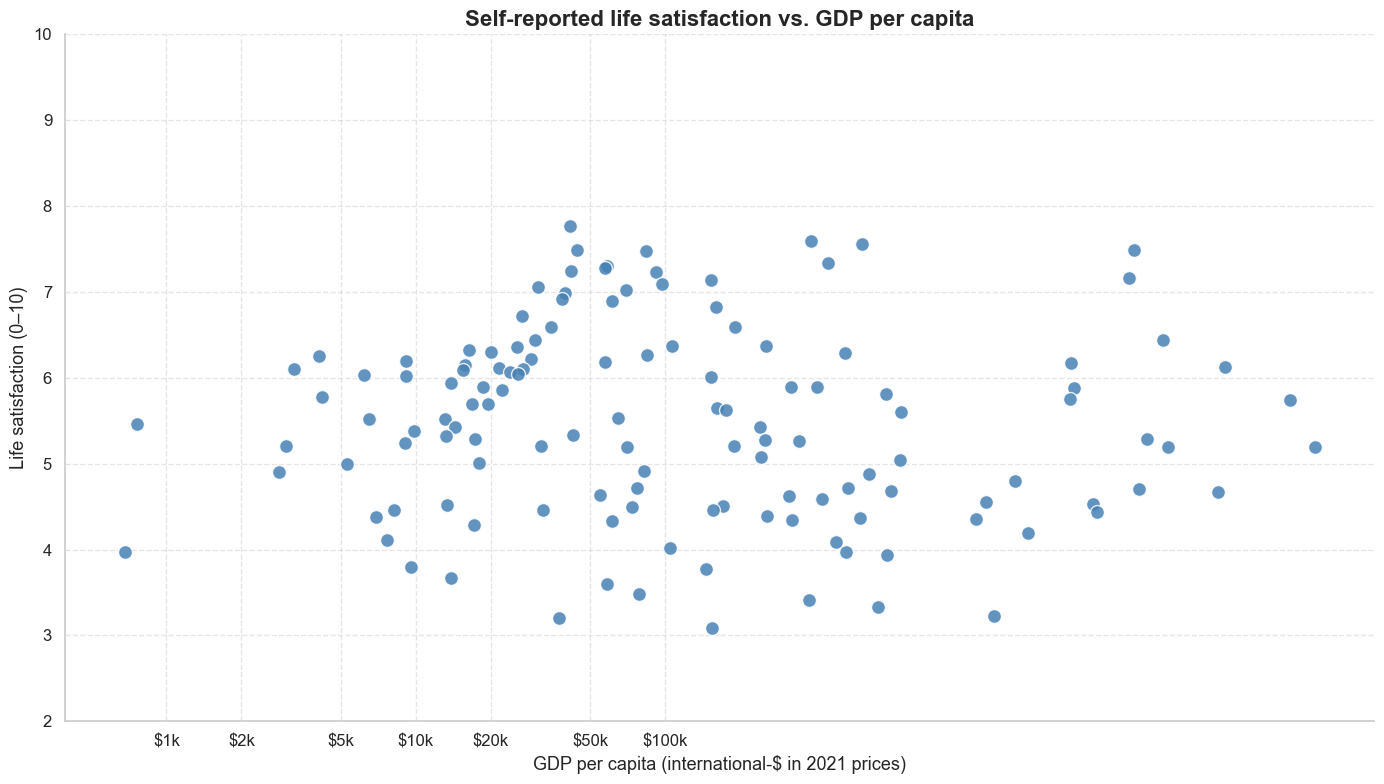

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


happiness_df = pd.read_csv("2019happy.csv")
gdp_df = pd.read_csv("WDI_new.csv")


happiness_df = happiness_df[['Country or region', 'Score']]
happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)


gdp_df = gdp_df[gdp_df['Series Name'] == 'GDP per capita (constant LCU)']
gdp_df = gdp_df[['Country Name', '2019 [YR2019]']]
gdp_df.rename(columns={'Country Name': 'Country', '2019 [YR2019]': 'GDP per capita'}, inplace=True)
gdp_df['GDP per capita'] = pd.to_numeric(gdp_df['GDP per capita'], errors='coerce')


merged_df = pd.merge(happiness_df, gdp_df, on='Country')
merged_df.dropna(inplace=True)


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

plt.scatter(
    merged_df['GDP per capita'],
    merged_df['Happiness Score'],
    color='steelblue',
    edgecolor='white',
    s=100,
    alpha=0.85
)

plt.xscale('log')


xticks = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.xticks(xticks, [f"${int(x/1000)}k" for x in xticks], fontsize=12)

plt.yticks(range(2, 11), fontsize=12)
plt.ylim(2, 10)


plt.xlabel('GDP per capita (international-$ in 2021 prices)', fontsize=13)
plt.ylabel('Life satisfaction (0–10)', fontsize=13)
plt.title('Self-reported life satisfaction vs. GDP per capita', fontsize=16, weight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import plotly.express as px

# 1. Data inladen
whr_df = pd.read_csv('2019happy.csv')
wdi_df = pd.read_csv('WDI_new.csv')

# 2. Werkloosheidsdata extraheren voor 2019
unemployment_df = wdi_df[wdi_df['Series Code'] == 'SL.UEM.TOTL.NE.ZS'][['Country Name', '2019 [YR2019]']]
unemployment_df.rename(columns={'2019 [YR2019]': 'Werkloosheidsgraad'}, inplace=True)
unemployment_df['Werkloosheidsgraad'] = pd.to_numeric(unemployment_df['Werkloosheidsgraad'], errors='coerce')

# 3. Bevolkingsdata extraheren voor 2019
population_df = wdi_df[wdi_df['Series Code'] == 'SP.POP.TOTL'][['Country Name', '2019 [YR2019]']]
population_df.rename(columns={'2019 [YR2019]': 'Bevolking'}, inplace=True)
population_df['Bevolking'] = pd.to_numeric(population_df['Bevolking'], errors='coerce')

# 4. Datasets samenvoegen op landnaam
merged_df = pd.merge(whr_df, unemployment_df, left_on='Country or region', right_on='Country Name', how='inner')
merged_df = pd.merge(merged_df, population_df, on='Country Name', how='inner')

# 5. Relevante kolommen selecteren en ontbrekende waarden verwijderen
merged_df = merged_df[['Country Name', 'Score', 'Werkloosheidsgraad', 'Bevolking']].dropna()

# 6. Bubble plot maken
fig = px.scatter(
    merged_df,
    x='Werkloosheidsgraad',
    y='Score',
    size='Bevolking',
    hover_name='Country Name',
    title='Werkloosheidsgraad vs Geluksindex per Land (2019)',
    labels={'Werkloosheidsgraad': 'Werkloosheidsgraad (%)', 'Score': 'Geluksindex'},
    size_max=60
)

# 7. Plot weergeven
fig.show()